In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

# import matplotlib and set inline for jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(type(iris.data))
iris.data.shape

<class 'numpy.ndarray'>


(150, 4)

NameError: name 'X_reduced' is not defined

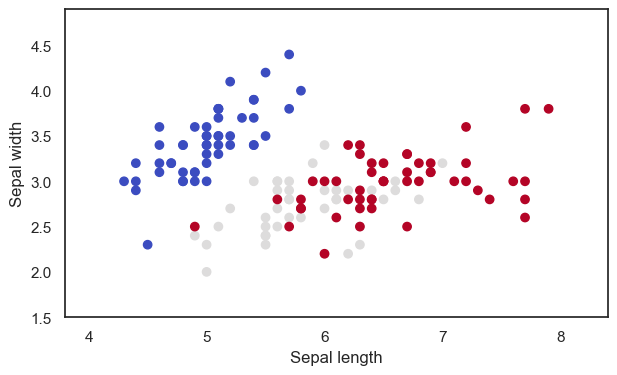

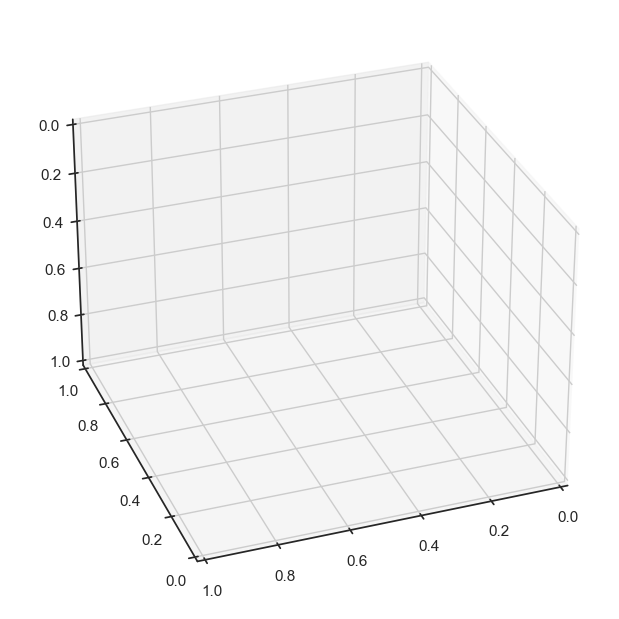

In [3]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


plt.figure(2, figsize=(7, 4))

plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)


ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])


ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

print(iris.target_names)
df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.head(20)

In [ ]:
# Let's see how many examples we have of each species
df["species"].value_counts()

In [ ]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

In [ ]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, size=6)

In [ ]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="sepal length (cm)", data=df)

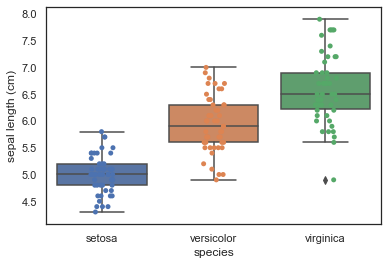

In [10]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="sepal length (cm)", data=df)
ax = sns.stripplot(x="species", y="sepal length (cm)", data=df, jitter=True, edgecolor="gray")

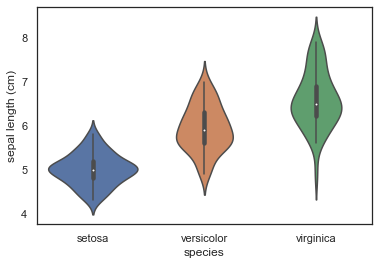

In [11]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="sepal length (cm)", data=df, size=6)

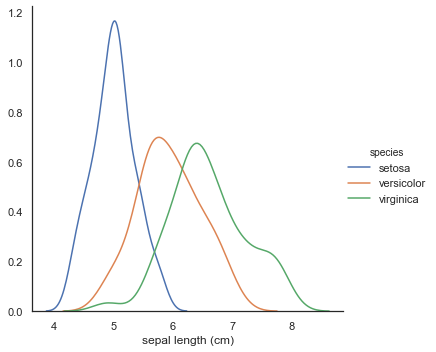

In [12]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(df, hue="species", size=5) \
   .map(sns.kdeplot, "sepal length (cm)") \
   .add_legend()

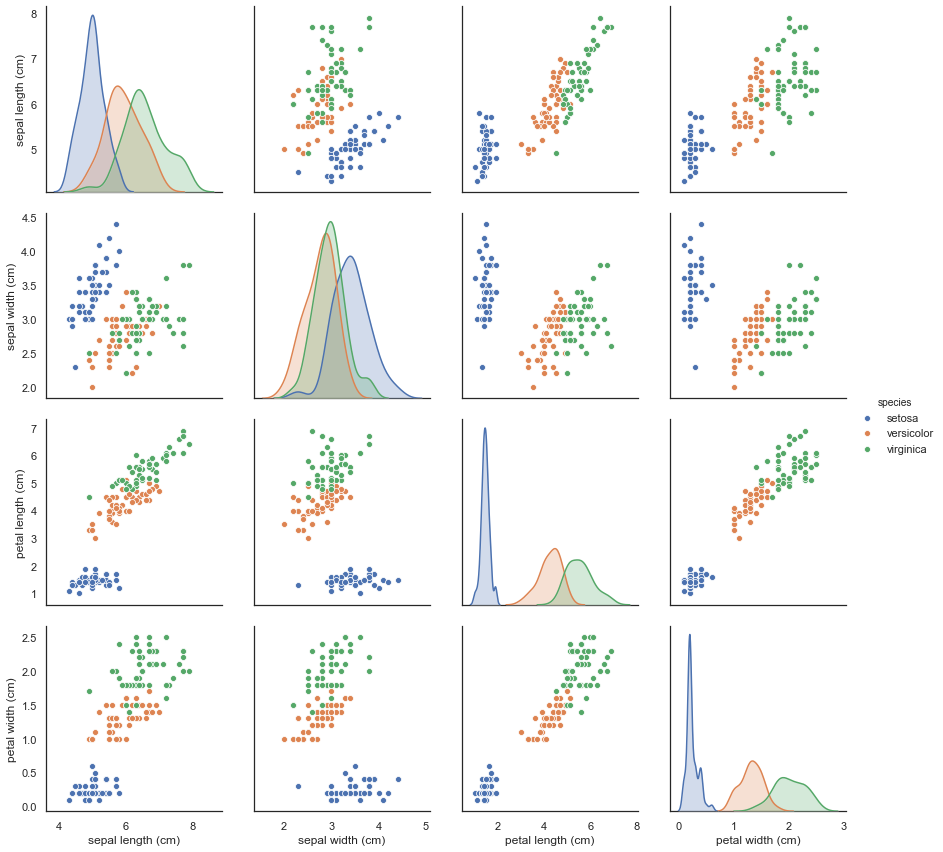

In [13]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df.drop("target", axis=1), hue="species", size=3)

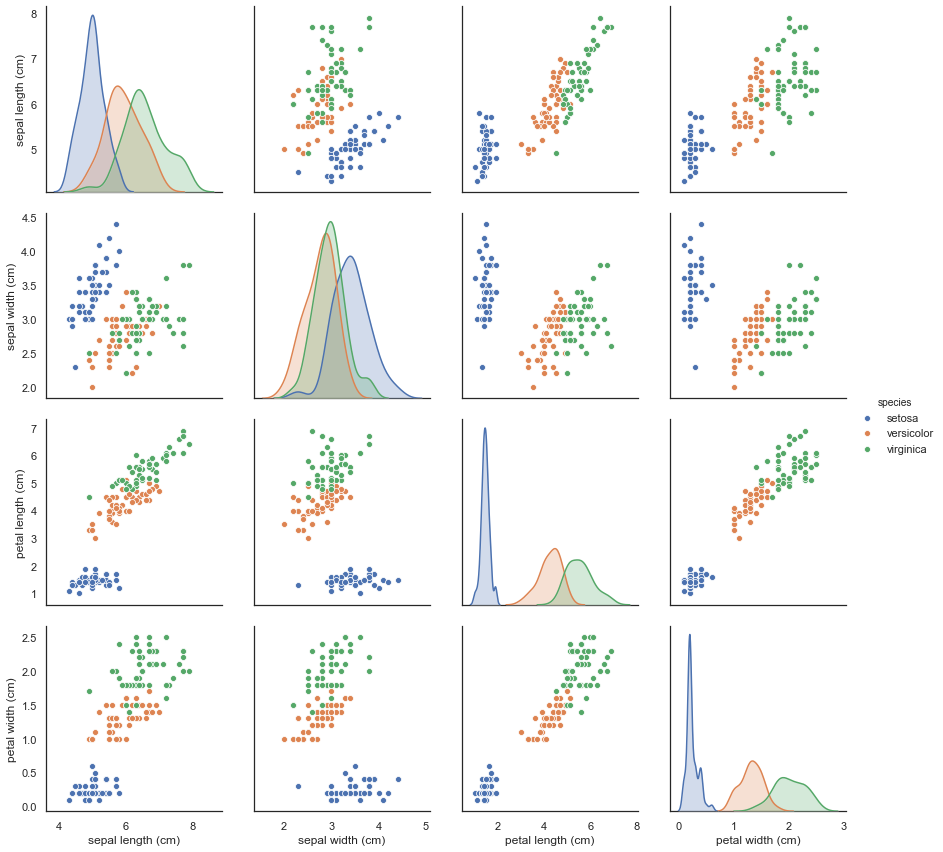

In [14]:

# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df.drop("target", axis=1), hue="species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0BA1AD548>,
      dtype=object)

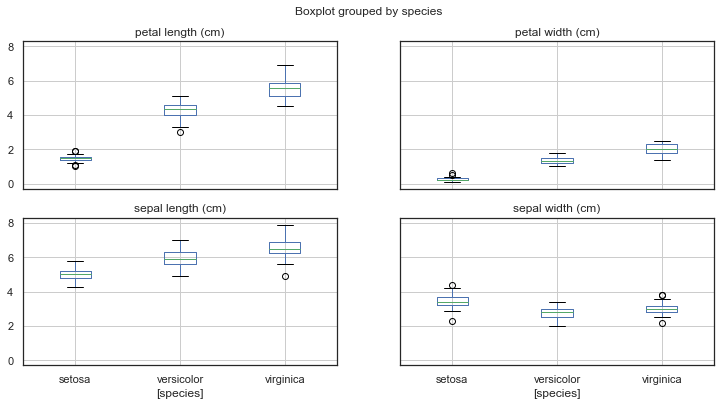

In [15]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
df.drop("target", axis=1).boxplot(by="species", figsize=(12, 6))

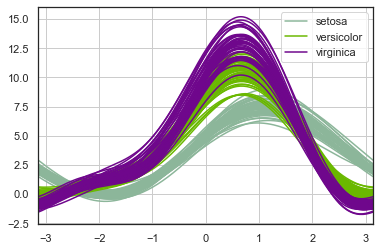

In [16]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df.drop("target", axis=1), "species")

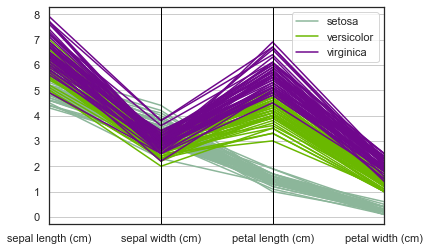

In [17]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop("target", axis=1), "species")

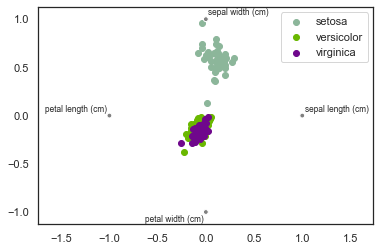

In [18]:

# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(df.drop("target", axis=1), "species")